<a href="https://colab.research.google.com/github/karthicsalem/Mysql/blob/master/Bigmart_Eval2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is group 3 consisting of Dheeraj (18069), Logesh(18129), Somnath(18150), Karthic(18231) and Shashank(18149). Presenting the BigMart dataset.

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import  scipy as sc
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline


# Reading Bigmart Dataset

In [ ]:
df=pd.read_csv('https://github.com/karthicsalem/fods-sem-5/raw/master/bigmart.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


The BigMart dataset contains 2013 sales data about 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

In [ ]:
df.shape

(8523, 12)

We have to look at the dataset structure before any preprocessing. Our dataset have 8523 rows and 12 columns.

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Our dataset details various attributes about products and markets such as - weight, fat content, MRP, outlet size, outlet type, outlet location and product sales. These attributes will be useful in our analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


A short description on column names and types. We will further try to impute Object types to float with various techniques.

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

##Exploratory Data Analysis

After understanding the dimensions and properties of data, we have to deep dive and explore the data visually. It helps us in understanding the nature of data in terms of distribution of the individual variables/features, finding missing values, relationship with other variables and many other things.

In [ ]:
sns.set_style('white')
sns.set_style('ticks')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


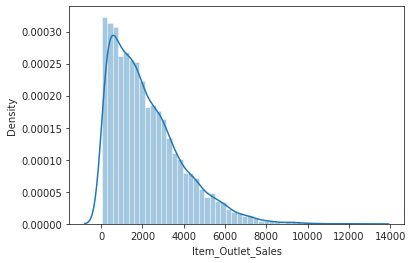

In [ ]:
sns.distplot(df['Item_Outlet_Sales']);

Plotted Outlet sales to understand the distribution better as it is an important attribute to our analysis. We observe that -
Deviate from the normal distribution, Have appreciable positive skewness, Show peakedness.

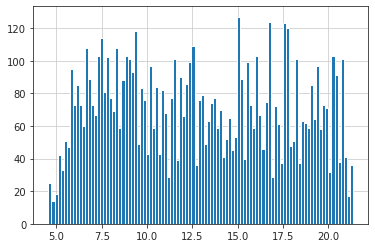

In [ ]:
df['Item_Weight'].hist(bins = 100);

There seems to be no clear-cut pattern in Item_Weight. 

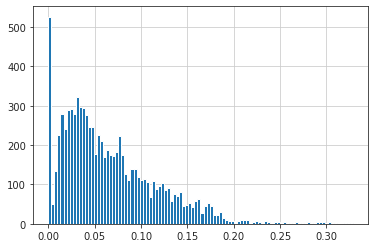

In [ ]:
df['Item_Visibility'].hist(bins = 100);

Item_Visibility is right-skewed and should be transformed to curb its skewness. Especially because there is no practical sense of an item having 0 visbility.

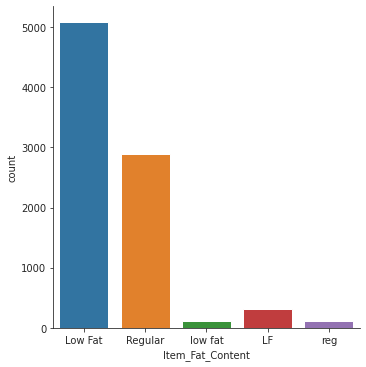

In [ ]:
sns.catplot(x="Item_Fat_Content", kind="count", data=df);

In the figure above, ‘LF’, ‘low fat’, and ‘Low Fat’ are the same category and can be combined into one. Similarly we can be done for ‘reg’ and ‘Regular’ into one. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


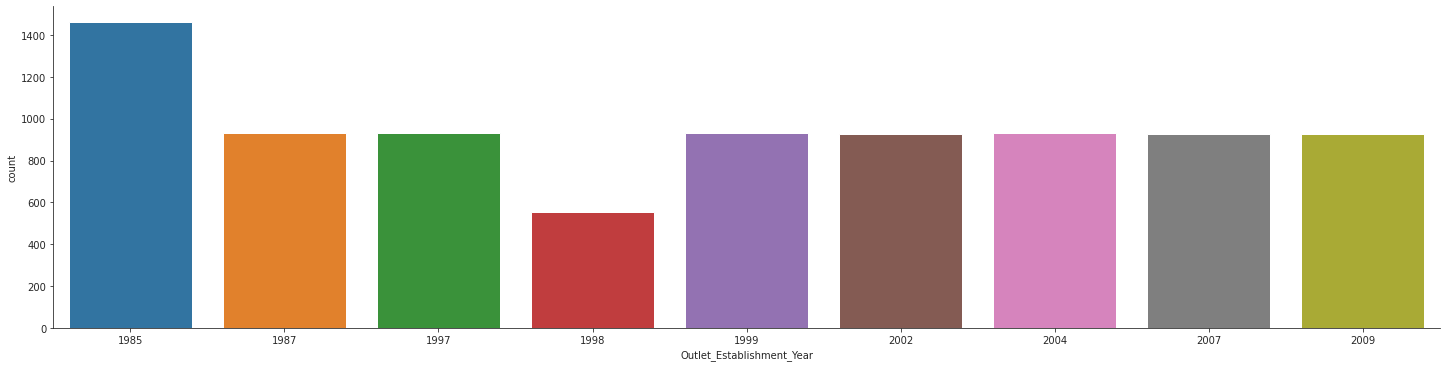

In [ ]:
sns.catplot('Outlet_Establishment_Year',kind = 'count',data = df,aspect =4);

Lesser number of observations in the data for the outlets established in the year 1998 as compared to the other years. This column does not seem to be of much value and might be changed to "From_year established" for further analysis.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


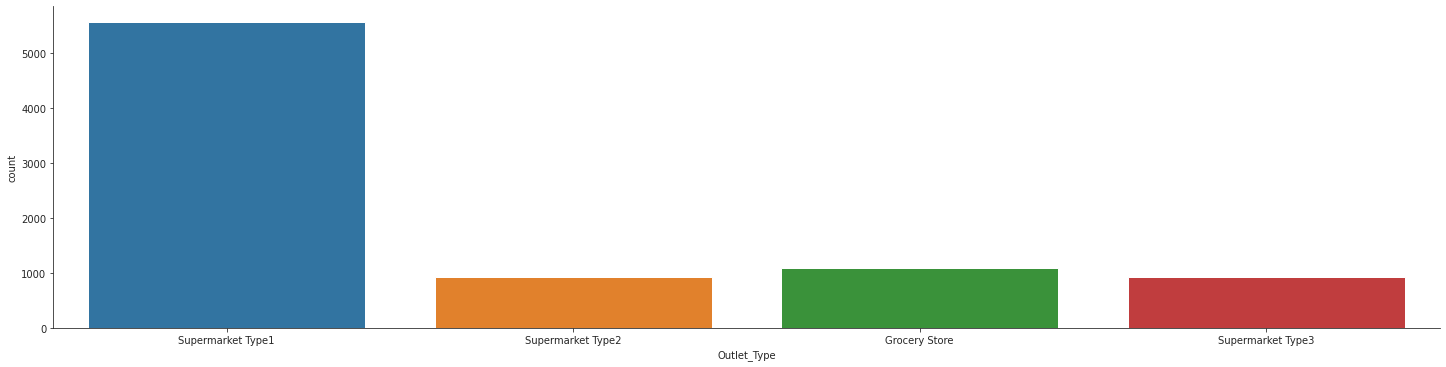

In [ ]:
sns.catplot('Outlet_Type',kind = 'count',data = df,aspect =4);

There is much greater data observations for supermarket type 1 in comparison to others

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


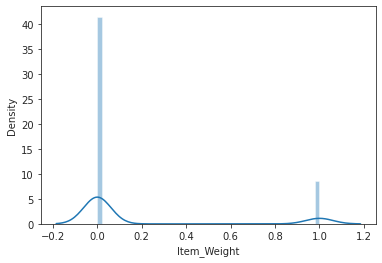

In [ ]:
sns.distplot(df['Item_Weight'].isnull());

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


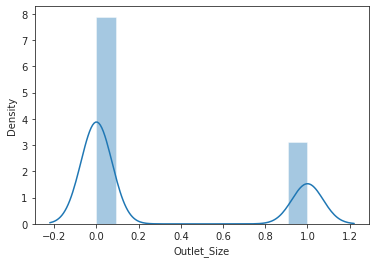

In [ ]:
sns.distplot(df['Outlet_Size'].isnull());

From this plot we infer that Item_Weight and Outlet_Size needs preprocessing to remove the null values (shown by 0).

# Modifying Fat Category

In [ ]:
d=df.copy()
df.describe()
d['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
d['Item_Fat_Content'] = d['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
d['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

# Checking for null values

In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.shape

(8523, 12)

In [ ]:
df['Item_Weight'].nunique()

415

# Filling Null Values Item_Weight 
  *   By Average value of weight for each Item_Identifier
  *   Remaining by Average value of Item_fat_content 



In [ ]:
d['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
b=d.groupby(['Item_Identifier'])
b.mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,11.600,0.031956,141.865400,2001.166667,1843.600200
DRA24,19.350,0.048062,164.086800,1995.000000,2246.218971
DRA59,8.270,0.134718,185.179900,1995.875000,2614.430150
DRB01,7.390,0.082126,189.586333,1990.333333,1518.024000
DRB13,6.115,0.008002,189.693000,1999.000000,2428.838400
...,...,...,...,...,...
NCZ30,6.590,0.024956,120.752657,1997.428571,1807.647000
NCZ41,19.850,0.051623,125.630400,2001.800000,1827.487840
NCZ42,10.500,0.009044,236.644800,1999.000000,3839.801760


In [ ]:
d['Item_Weight']=d['Item_Weight'].fillna(d.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
d

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
d[d['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


In [ ]:
d['Item_Weight']=d['Item_Weight'].fillna(d.groupby(['Item_Type','Item_Fat_Content'])['Item_Weight'].transform('mean'))
d[d['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


# Filling Null Values in Outlet_Size
*   By most frequent value of Outlet_Type




In [ ]:
d['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
from scipy.stats import mode
common= d.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x)[0]) )
common

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [ ]:
temp= d['Outlet_Size'].isnull()
d.loc[temp,'Outlet_Size'] = d.loc[temp,'Outlet_Type'].apply(lambda x: common[x])
d.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Categorising using Item_identifier


0.   Drinks
1.   Food
2.   Non-Consumable





In [ ]:
d['Item_Category']=d['Item_Identifier'].str[:2]
rename={'Item_Category':{'FD':'Food','NC':'Non-Consumable','DR':'Drinks'}}
d.replace(rename,inplace=True)
d['Item_Category']=d['Item_Category'].astype('category')
d['Item_Category'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

In [ ]:
d['Item_Cat']=d['Item_Category'].cat.codes
d['Item_Cat'].value_counts()

1    6125
2    1599
0     799
Name: Item_Cat, dtype: int64

In [ ]:
sns.set_style('white')
sns.set_style('ticks')

##Visualization

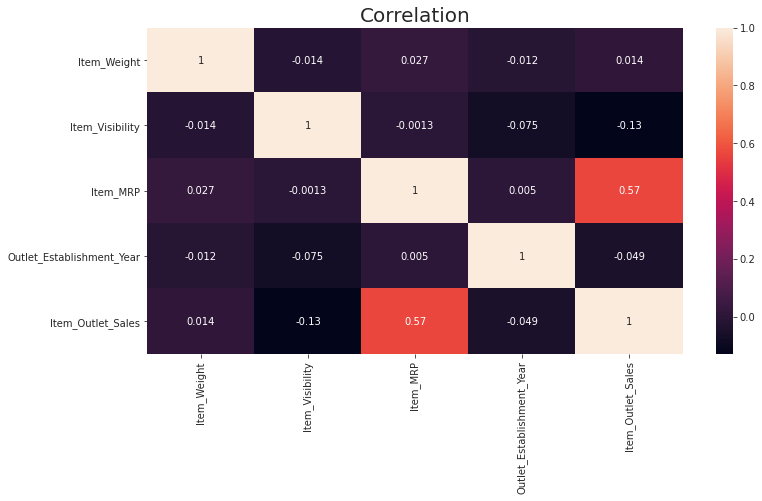

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True)
plt.title("Correlation",fontdict={'fontsize':20});

##Conclusion
This heatmap gives the ratio of interdependency between each column.The higher the value more the 2 columns are interrelated.


##1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


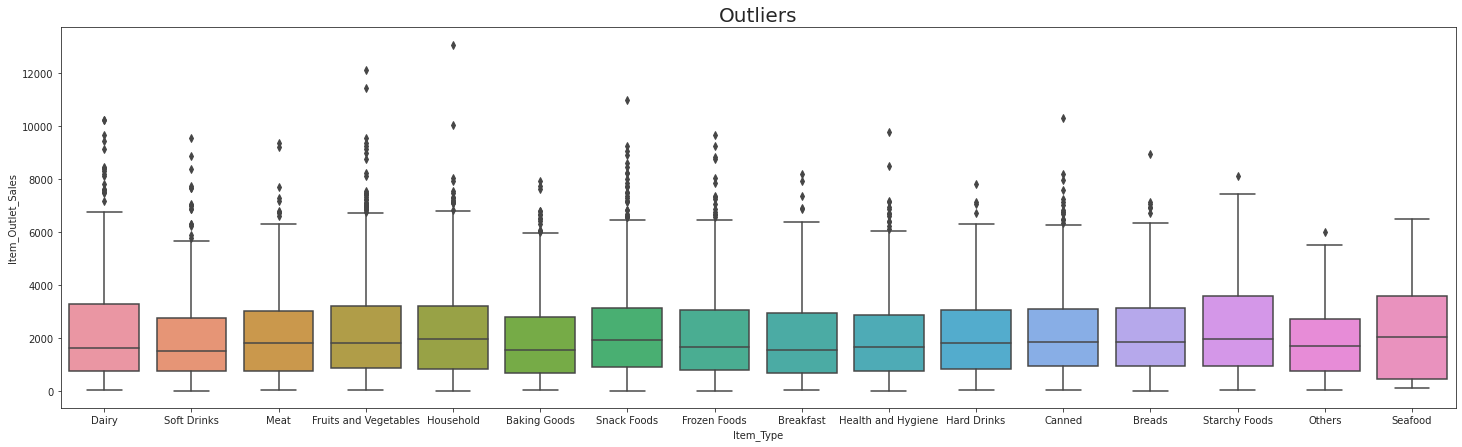

In [ ]:
plt.figure(figsize=(25,7))
sns.boxplot(d['Item_Type'],d['Item_Outlet_Sales'])
plt.title("Outliers",fontdict={'fontsize':20});

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/pyth

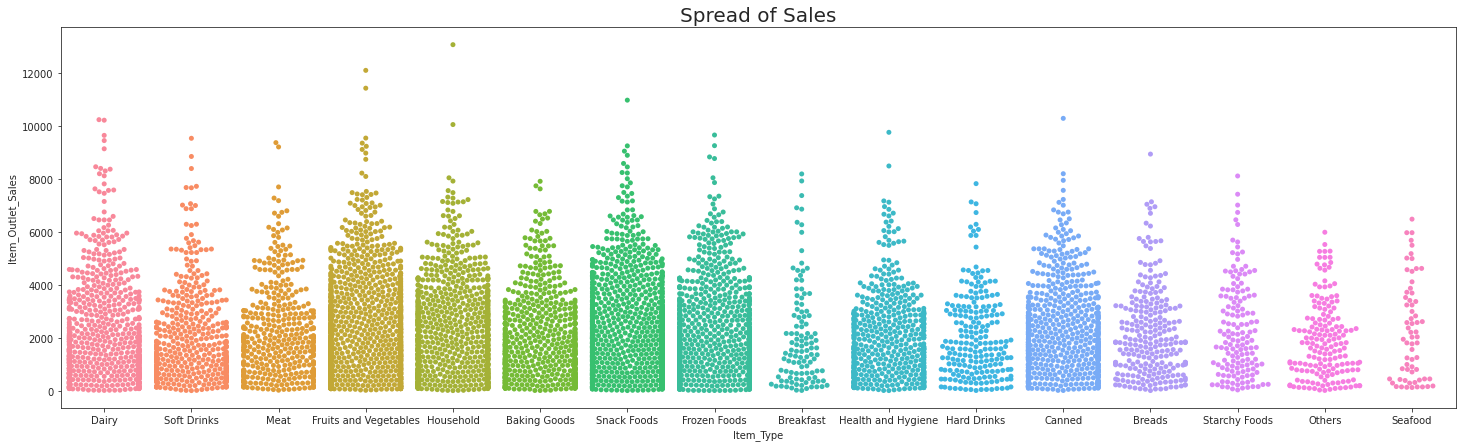

In [ ]:
plt.figure(figsize=(25,7))
sns.swarmplot(d['Item_Type'],d['Item_Outlet_Sales'])
plt.title("Spread of Sales",fontdict={'fontsize':20});


##Conclusion
From the above Box plot we can find that the Item sales above 6000 are considered outliers and the swar plot re emphasizes that the item sales are mostly below the value of 6000


##2

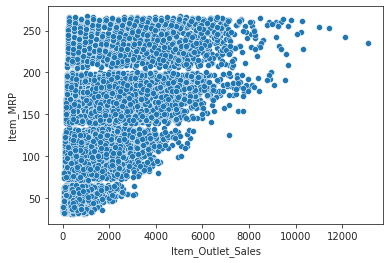

In [ ]:
sns.scatterplot(data=d,x="Item_Outlet_Sales",y="Item_MRP")
plt.title("",fontdict={'fontsize':20});

##Conclusion
Though from the previous scatter plot we found the item sales on a average is 6000 from this plot we infer that the item with price 50 and 100 has a substantial sale in the range of 2000 and 4000 respectively.The other two item price has the range of 0-6000 like we inferred above.

##3

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


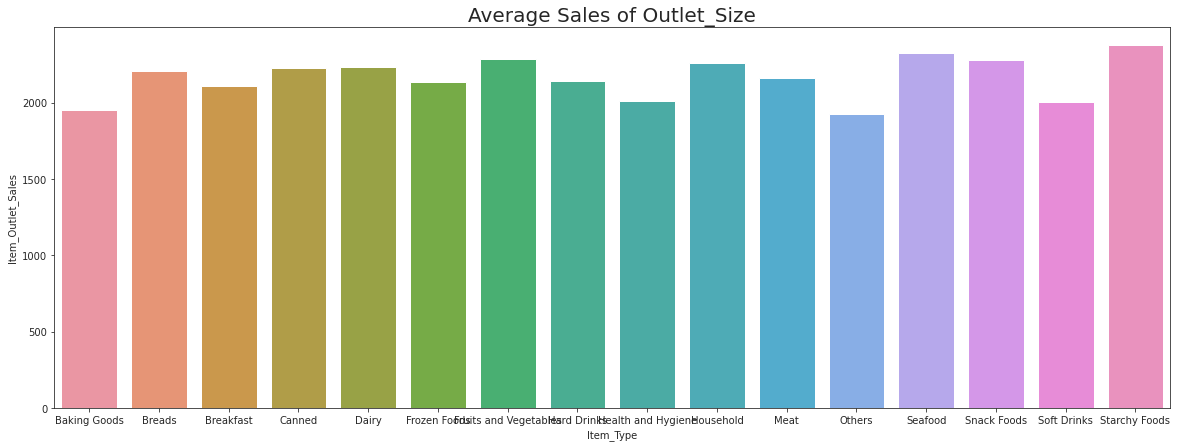

In [ ]:
plt.figure(figsize=(20,7))
sns.set_style('white')
sns.set_style('ticks')
#h=d.groupby('Outlet_Size').mean()
h=d.groupby('Item_Type').mean()

sns.barplot(h.index,h['Item_Outlet_Sales'])
plt.title("Average Sales of Outlet_Size",fontdict={'fontsize':20});

##Conclusion
From this box plot we find that the shops of medium size has more sales on average follwed by high and the small sized shops.

##4

In [ ]:
"""plt.figure(figsize=(17,7))
sns.set_style('white')
sns.set_style('ticks')
g=d.groupby(['Item_Category','Item_Fat_Content']).mean()
sns.barplot(g.index,g['Item_Visibility'])
plt.title("Average Visilibilty of Item_Types",fontdict={'fontsize':20});"""
#Even though visibility is higher for drinks-regular, drinks-low fat and Food-regular have higher sales.

'plt.figure(figsize=(17,7))\nsns.set_style(\'white\')\nsns.set_style(\'ticks\')\ng=d.groupby([\'Item_Category\',\'Item_Fat_Content\']).mean()\nsns.barplot(g.index,g[\'Item_Visibility\'])\nplt.title("Average Visilibilty of Item_Types",fontdict={\'fontsize\':20});'

##Conclusion
In every shop the average visibility of drinks with regular(with regular fat content) is more,meaning that the drinks have been alloted more spaces for display.

##5

In [ ]:
"""plt.figure(figsize=(17,7))
sns.set_style('white')
sns.set_style('ticks')
g=d.groupby(['Item_Category','Item_Fat_Content']).mean()
sns.barplot(g.index,g['Item_Outlet_Sales'])
plt.title("Average Visilibilty of Item_Types",fontdict={'fontsize':20});"""

'plt.figure(figsize=(17,7))\nsns.set_style(\'white\')\nsns.set_style(\'ticks\')\ng=d.groupby([\'Item_Category\',\'Item_Fat_Content\']).mean()\nsns.barplot(g.index,g[\'Item_Outlet_Sales\'])\nplt.title("Average Visilibilty of Item_Types",fontdict={\'fontsize\':20});'

In [ ]:
"""plt.figure(figsize=(16,5))
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=d,hue='Item_Category')
plt.title("Sales by Outlet_Types",fontdict={'fontsize':20});"""
#On average food items have higher outlet sales.

'plt.figure(figsize=(16,5))\nsns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=d,hue=\'Item_Category\')\nplt.title("Sales by Outlet_Types",fontdict={\'fontsize\':20});'

##Conclusion
From the above two barplots it is inferred that the sales of food items is more than that of drinks and non_consumables.We can also infer from the first plot people prefer low fat content products.

##6

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


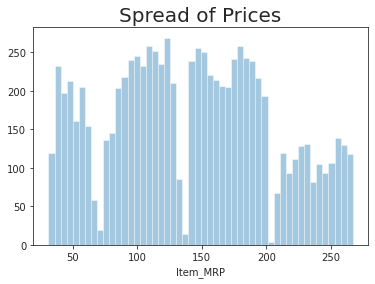

In [ ]:
sns.distplot(d["Item_MRP"],kde=False,bins=50)
plt.title("Spread of Prices",fontdict={'fontsize':20})
plt.show()
#We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

##Conclusion
The range for the item price is from 0-250.But from this distplot is clear that the item price is not evenly distributed.In each range(meaning 0-100,100-150,150-200,200-300),the item price lies predominantly in some ranges groups. We can clearly see 4 different distributions for Item_MRP. It is an interesting insight.

##7

In [ ]:
"""f, axes = plt.subplots(1, 2, figsize=(22,7))
f.suptitle('Sales and Visibility \nBy Category and Fat', fontsize=23,fontweight="bold")
#f.figsize=(20,7)

g=d.groupby(['Item_Category','Item_Fat_Content']).mean()
sns.barplot(g.index,g['Item_Visibility'], ax=axes[0]);
axes[0].set_title('Visibility', color="black",fontweight="bold")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

h=d.groupby(['Item_Category','Item_Fat_Content']).mean()
sns.barplot(h.index,h['Item_Outlet_Sales'],ax=axes[1]);
axes[1].set_title('Sales', color="black",fontweight="bold")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.show()
"""

'f, axes = plt.subplots(1, 2, figsize=(22,7))\nf.suptitle(\'Sales and Visibility \nBy Category and Fat\', fontsize=23,fontweight="bold")\n#f.figsize=(20,7)\n\ng=d.groupby([\'Item_Category\',\'Item_Fat_Content\']).mean()\nsns.barplot(g.index,g[\'Item_Visibility\'], ax=axes[0]);\naxes[0].set_title(\'Visibility\', color="black",fontweight="bold")\naxes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)\n\nh=d.groupby([\'Item_Category\',\'Item_Fat_Content\']).mean()\nsns.barplot(h.index,h[\'Item_Outlet_Sales\'],ax=axes[1]);\naxes[1].set_title(\'Sales\', color="black",fontweight="bold")\naxes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)\n\nplt.show()\n'

##Conclusion
From the prevoius graphs(4) we found out that Item category of food has more sales.From which we theorized that visiblity of Food will be more.But in above plot when both visiblity and item sales are compared its found that visibilty and sales are not corelated like they should have been.

In [ ]:
d['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

##8

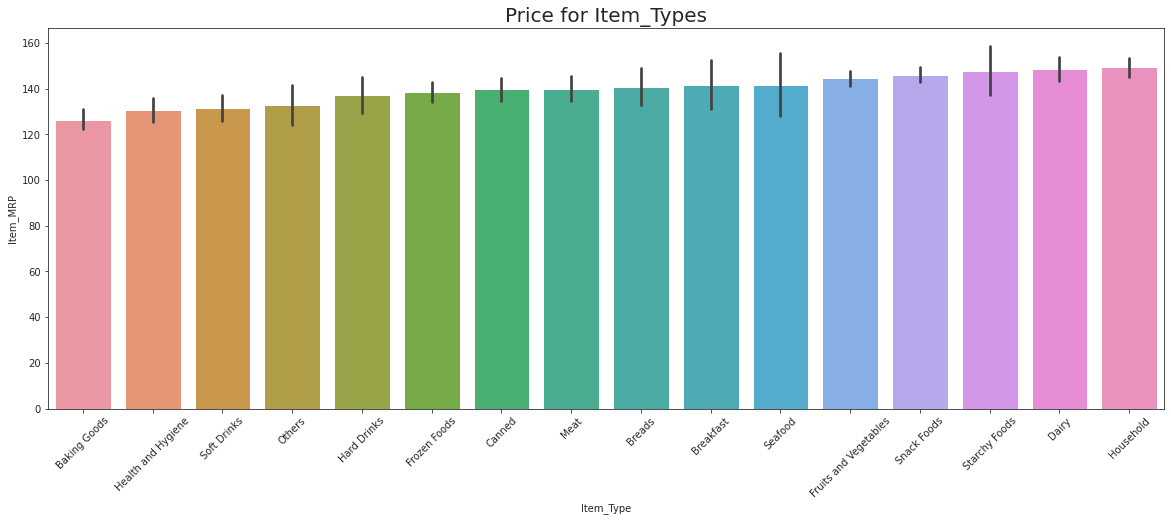

In [ ]:
plt.figure(figsize=(20,7))

sns.barplot(data=d, x="Item_Type",y="Item_MRP",order=d.groupby("Item_Type").mean().sort_values("Item_MRP").index)
plt.xticks(rotation=45)
plt.title("Price for Item_Types",fontdict={'fontsize':20})
plt.show()

##Conclusion
The barplot shows that though Starchy food has the maximum item mrp, on an average the item mrp of Household is more followed by others as depicted in the plot.

##9

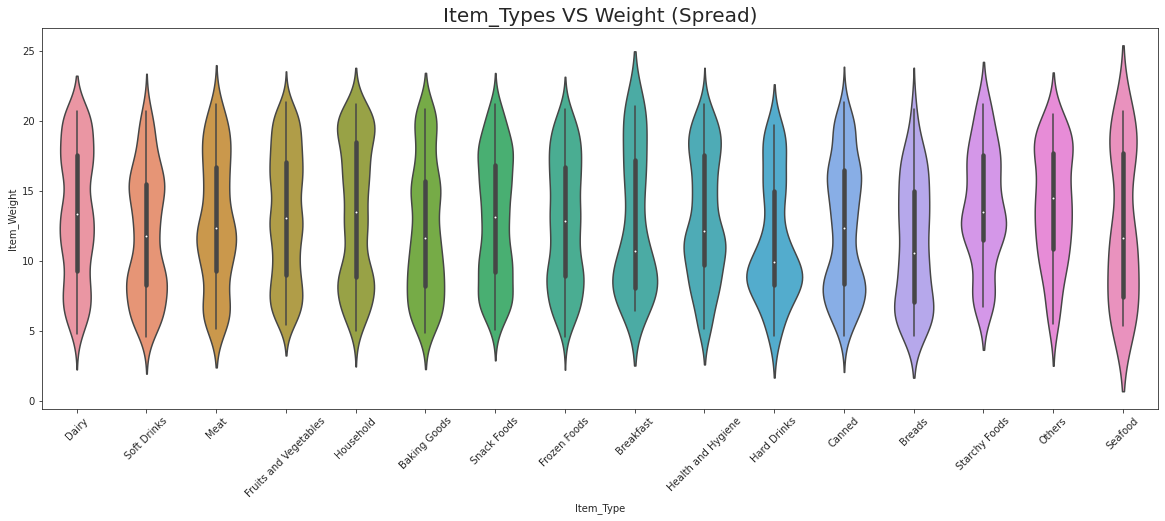

In [ ]:
plt.figure(figsize=(20,7))

sns.violinplot(data=d, x="Item_Type",y="Item_Weight")
plt.xticks(rotation=45)
plt.title("Item_Types VS Weight (Spread)",fontdict={'fontsize':20})
plt.show()
#Expecting some products to lie in a particular range, we created this violing plot. But from the given plot, we conclue that the weights are so diverse.

##Conclusion
From this violin plot we can see that the item weights in each item types is evenly distributed all along the range of 0-25.
Though the only anomaly is that the Hard drinks have values slightly predominant in the range of 5-10 

##10

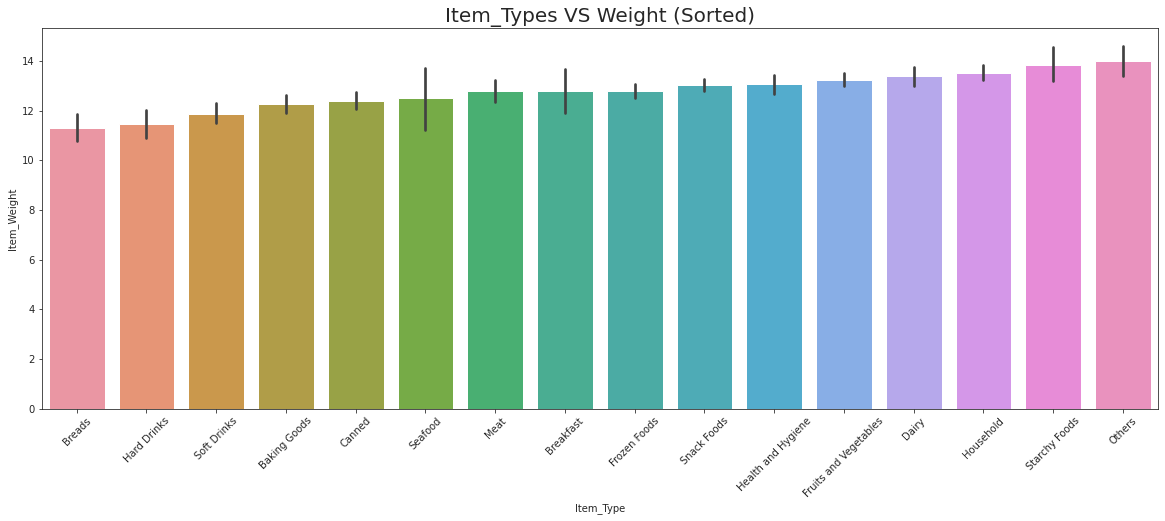

In [ ]:
plt.figure(figsize=(20,7))

sns.barplot(data=d, x="Item_Type",y="Item_Weight",order=d.groupby("Item_Type").mean().sort_values("Item_Weight").index)
plt.xticks(rotation=45)
plt.title("Item_Types VS Weight (Sorted)",fontdict={'fontsize':20})
plt.show()

In [ ]:
x=d.groupby('Item_Type').mean()['Item_Weight'].round(0)
x=pd.DataFrame(x)
x

,Item_Weight
Item_Type,
Baking Goods,12.0
Breads,11.0
Breakfast,13.0
Canned,12.0
Dairy,13.0
Frozen Foods,13.0
Fruits and Vegetables,13.0
Hard Drinks,11.0
Health and Hygiene,13.0


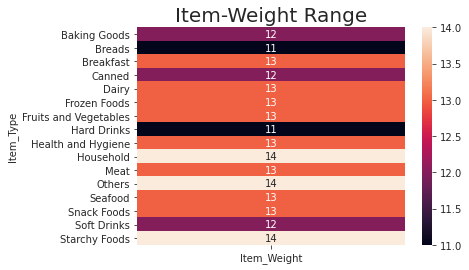

In [ ]:
sns.heatmap(x,annot=True)
plt.title("Item-Weight Range",fontdict={'fontsize':20});

##Conclusion
From the above barplot it can be concluded that the average weight of all item types lies in the range of 10-14 and the item type Others has the highest average weight. This is further shown in the heatmap that the range is from 11-14 when the values are rounded off.



#Hypothesis Testing

In [ ]:
d[d["Item_Type"] == "Dairy"].isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Category                0
Item_Cat                     0
dtype: int64

In [ ]:
d[d["Item_Type"] == "Dairy"]["Item_Identifier"].value_counts()

FDW26    9
FDV38    9
FDA15    8
FDX50    8
FDZ26    8
        ..
FDA14    3
FDV14    3
FDE39    2
FDZ50    2
FDE52    1
Name: Item_Identifier, Length: 125, dtype: int64

In [ ]:
# 1.
# Dairy food products sell than other items

1. Tier 1 has more sales since the population is more
2. Stores with big size will have higher sales since all types of products are there
3. More the visibility, more the space it occupies. so more the sales.
4. Dairy food products sell than other items 
5. An older establishment will have higher sales, as customers are aware it.

In [ ]:
def right_normal_test(n,xbar,mu,sigma,alpha):
    z = round((xbar-mu)/(sigma/np.sqrt(n)),2)
    z_critical = round(abs(st.norm.ppf(alpha)),2)
    
    if(z<z_critical):
        rejection = False 
        print("Reject the claim")
    else:
        rejection = True
        print("Accept the claim")
    return rejection, z, z_critical

In [ ]:
def right_p_test(n,xbar,mu,sigma,alpha):
    z = round((xbar-mu)/(sigma/np.sqrt(n)),2)
    p = round(st.norm.cdf(z),2)
    
    if(p > alpha): #Add your condition check
        rejection = False
        print("Reject the claim") 
    else:
        rejection = True
        print("Accept the claim")
    return rejection, z, p

In [ ]:
def left_normal_test(n,xbar,mu,sigma,alpha):
    z = round((xbar-mu)/(sigma/np.sqrt(n)),2)
    z_critical = round((st.norm.ppf(alpha)),2)
    
    if(z<z_critical): #Add your condition check
        rejection = False 
    else:
        rejection = True
    return rejection, z, z_critical

In [ ]:
def right_t_test(n,alpha,mu,xbar,s):

    df=n-1

    t=(xbar-mu)/(s/np.sqrt(n))
    t_critical=st.t.ppf(alpha,df)
    if(abs(t)>abs(t_critical)):
        print("reject Null hypothesis")
        print("Accept the claim")
    else:
        print("accept null hypothesis")
        print("Reject the claim")

In [ ]:
#mu [sample 30 of tier 1] > mu [population avg sales]

In [ ]:
import scipy.stats as st

# **Hypothesis Testing**

**1.We claim that tier 1 malls has higher sales, as it is in a densely populated region. To test the claim, we sample 31 shops. The sample mean was 1900 dollars, and the population standard deviation was - dollars. At 0.05 level of significance, we are trying to test the claim. Based on Bigmart dataset, the mean sales of all shopping malls was 2181 dollars.**

1. H0: mu = 2181
  Ha: mu > 2181

In [ ]:
mu=d["Item_Outlet_Sales"].mean()
n=31
xbar=d[d["Outlet_Location_Type"] == "Tier 1"][0:2388][::79]["Item_Outlet_Sales"].mean()
#sigma = 
print("MU "+str(mu)+" xbar " + str(xbar))

MU 2181.2889135750365 xbar 1900.6227483870966


In [ ]:

mu=d["Item_Outlet_Sales"].mean()
n=31
xbar=d[d["Outlet_Location_Type"] == "Tier 1"][0:2388][::79]["Item_Outlet_Sales"].mean()
sigma = d["Item_Outlet_Sales"].std()
alpha=.05
right_normal_test(n,xbar,mu,sigma,alpha)


Reject the claim


(False, -0.92, 1.64)

In [ ]:
d[d["Outlet_Location_Type"] == "Tier 1"]["Item_Outlet_Sales"].mean()

1876.9091591289784

In [ ]:
d[d["Outlet_Location_Type"] == "Tier 1"].shape

(2388, 14)

In [ ]:
d[d["Outlet_Location_Type"] == "Tier 1"][0:2388][::79].shape

(31, 14)

**The assumption is that the tier 1 will have more sales due to higher population present. But when hypothesis testing for a confidence of 95% was done using sample taken from tier 1 shops we found that the assumption is not true.** 

**2.We claim that bigger stores have higher sales, since all types of products are there.To test the claim, we sample 45 shops. The sample mean was 1900 dollars, and the population standard deviation was - dollars. At 0.05 level of significance, we are trying to test the claim. Based on Bigmart dataset, the mean sales of all shopping malls was 2181 dollars.**

H0: mu = 2181
Ha: mu > 2181

In [ ]:
d[d["Outlet_Size"] == "High"].shape

(932, 14)

In [ ]:
d["Outlet_Size"].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
d[d["Outlet_Size"] == "High"][0:932][::21].shape

(45, 14)

In [ ]:
mu=d["Item_Outlet_Sales"].mean()
n=45
xbar=d[d["Outlet_Size"] == "High"][0:932][::21]["Item_Outlet_Sales"].mean()
sigma = d["Item_Outlet_Sales"].std()
alpha=.05
right_normal_test(n,xbar,mu,sigma,alpha)

Reject the claim


(False, 0.11, 1.64)

In [ ]:
print(xbar)

2209.2279688888875


In [ ]:
print(mu)

2181.2889135750365


In [ ]:
print(sigma)

1706.499615733832


**The assumption is that bigger stores have higher sales, since all types of products are there.But when the hypothesis testing is done with the samples taken we found the claim made doesnt not have any evidence to support it with the confidence of 95%.**

**3.We claim that products with higher visibility have higher sales, as customers have easier access to it. To test the claim, we sample - shops. The sample mean was 1900 dollars, and the population standard deviation was - dollars. At 0.05 level of significance, we are trying to test the claim. Based on Bigmart dataset, the mean sales of all shopping malls was 2181 dollars.**

In [ ]:
d["Item_Visibility"].value_counts()

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [ ]:
d[d["Item_Visibility"]>0.16].shape

(501, 14)

In [ ]:
d["Item_Visibility"].shape

(8523,)

In [ ]:
d["Item_Visibility"].median()

0.05393093400000001

In [ ]:
d[d["Item_Visibility"]>0.16][::30].shape

(17, 14)

In [ ]:
mu=d["Item_Outlet_Sales"].mean()
n=17
xbar=d[d["Item_Visibility"]>0.16][::30]["Item_Outlet_Sales"].mean()
s = d[d["Item_Visibility"]>0.16][::30]["Item_Outlet_Sales"].std()
alpha=.05
right_t_test(n,alpha,mu,xbar,s)

reject Null hypothesis
Accept the claim


**Assumption is that products with higher visibility have higher sales, as customers have easier access to it. When the hypothesis testing is done with the sample taken we found that there was enough evidence to support the claim made with 95% confidence.**

**4.We claim that dairy products will sell much higher than other items, as it is needed on a  daily basis. To test the claim, we sample - shops. The sample mean was 1900 dollars, and the population standard deviation was - dollars. At 0.05 level of significance, we are trying to test the claim. Based on Bigmart dataset, the mean sales of all shopping malls was 2181 dollars.**

H0: mu = 2181
Ha: mu > 2181

In [ ]:
d[d["Item_Type"]=="Dairy"].shape

(682, 14)

In [ ]:
d["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
d[d["Item_Type"]=="Dairy"][0:680][::17].shape

(40, 14)

In [ ]:
sample = d[d["Item_Type"]=="Dairy"][0:680][::17]
mu=d["Item_Outlet_Sales"].mean()
n=sample.shape[0]
xbar=sample["Item_Outlet_Sales"].mean()
sigma = d["Item_Outlet_Sales"].std()
alpha=.01
right_p_test(n,xbar,mu,sigma,alpha)

Reject the claim


(False, -0.2, 0.42)

**Assumption is that dairy products will sell much higher than other items, as it is needed on a daily basis. When the hypothesis testing is done for a confidence interval of 95% we found that there was not enough evidence to support the claim.**

**5.We claim that an older establishment will have higher sales, as customers are aware it and have loyalty towards the mall. To test the claim, we sample - shops. The sample mean was - dollars, and the population standard deviation was - dollars. At 0.05 level of significance, we are trying to test the claim. Based on Bigmart dataset, the mean sales of all shopping malls was 2181 dollars.**

H0: mu = 2181
Ha: mu > 2181

In [ ]:
d["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
d[d["Outlet_Establishment_Year"]<1997].shape

(2395, 14)

In [ ]:
d["Outlet_Establishment_Year"].median

<bound method Series.median of 0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64>

In [ ]:
d[d["Outlet_Establishment_Year"]<1997][::75].shape

(32, 14)

In [ ]:
#85% confidence
sample = d[d["Outlet_Establishment_Year"]<1997][::75]
mu=d["Item_Outlet_Sales"].mean()
n=sample.shape[0]
xbar=sample["Item_Outlet_Sales"].mean()
sigma = d["Item_Outlet_Sales"].std()
alpha=.15
right_normal_test(n,xbar,mu,sigma,alpha)

Accept the claim


(True, 1.13, 1.04)

**Assumption is that an older establishment will have higher sales, as customers are aware it and have loyalty towards the mall. When the hypothesis testing is done for a confidence interval of 85% we found that there was enough evidence to support the claim.**

#**Linear regresion**

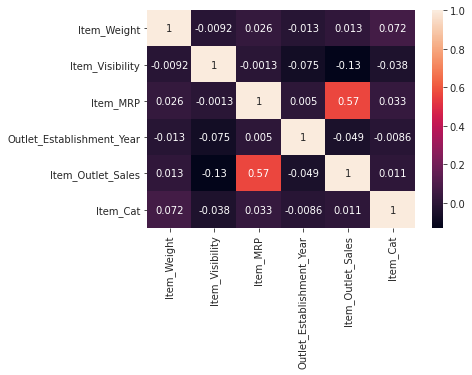

In [ ]:
sns.heatmap(d.corr(),annot=True);

**Since the correlation for Item MRP and Item sales is higher we are doing linear regression using these two columns with Items sales as the dependent variable**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x=d['Item_MRP'].values


In [ ]:
y=d['Item_Outlet_Sales'].values


In [ ]:
x=d['Item_MRP'].values
y=d['Item_Outlet_Sales'].values

In [ ]:
n=8523

In [ ]:
x = x.reshape((d.shape[0],1))

In [ ]:
reg=LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=reg.predict(x)

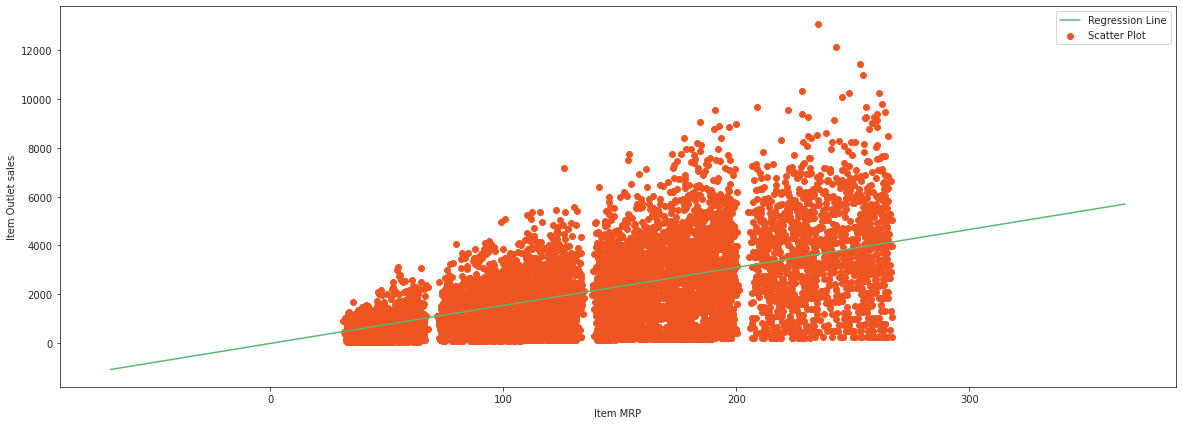

In [ ]:
max_x = np.max(x) + 100
min_x = np.min(x) - 100
plt.figure(figsize=(20,7))

x1 = np.linspace(min_x, max_x, 1000)
y1 = reg.intercept_ + reg.coef_[0] * x1

plt.plot(x1, y1, color='#58b970', label='Regression Line')

plt.scatter(x, y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Item MRP')
plt.ylabel('Item Outlet sales')
plt.legend()
plt.show()

In [ ]:
mse=mean_squared_error(y,y_pred)
r2_score=reg.score(x,y)
np.sqrt(mse)

1404.916386857582

In [ ]:
r2_score

0.3221407524979081

In [ ]:
k=[10,20]
k=np.array(k)
k=k.reshape(2,1)
print(reg.predict(k))

[143.95509253 299.48532788]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33,random_state=0)

In [ ]:
x_train=x_train.reshape((x_train.shape[0],1))
x_test=x_test.reshape((x_test.shape[0],1))

In [ ]:
reg.fit(x_train,y_train)
y1_pred=reg.predict(x_test)

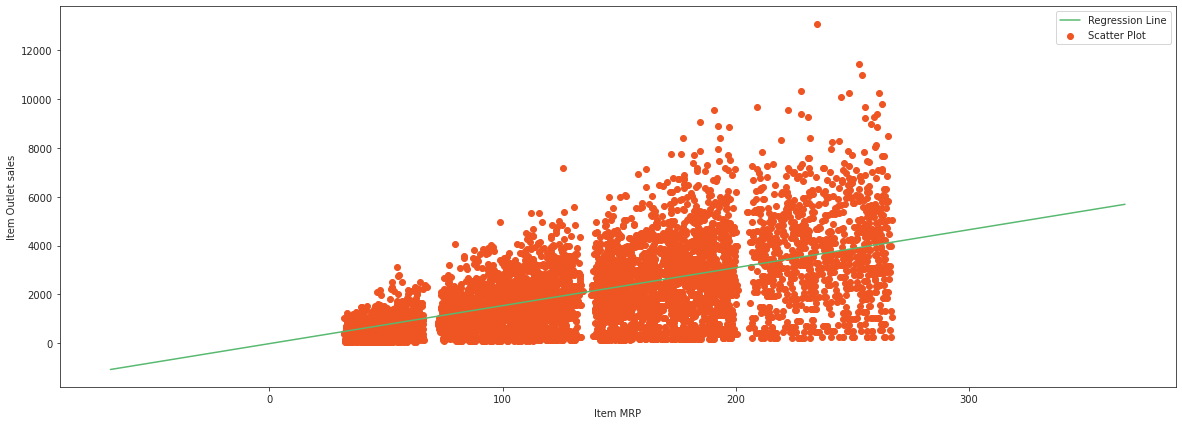

In [ ]:
max_x = np.max(x_train) + 100
min_x = np.min(x_train) - 100
plt.figure(figsize=(20,7))

x1 = np.linspace(min_x, max_x, 1000)
y1 = reg.intercept_ + reg.coef_[0] * x1

plt.plot(x1, y1, color='#58b970', label='Regression Line')

plt.scatter(x_train, y_train, c='#ef5423', label='Scatter Plot')

plt.xlabel('Item MRP')
plt.ylabel('Item Outlet sales')
plt.legend()
plt.show()

In [ ]:
mse=mean_squared_error(y_test,y1_pred)
r2_score=reg.score(x_train,y_train)
np.sqrt(mse)

1434.7101429973047

In [ ]:
r2_score

0.3271360387839035

In [ ]:
print(reg.predict(k))

[138.81968028 294.30687508]


#**Multivariate Regression**

#**Linear Regression for Item Visibility using Item Sales**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
d.info()
#drop - 0,6,12
#encode - fatcontent (2), item type (4), outletsize (8),location type (9), outlet type (10)
#split into visi 0 and >

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            8523 non-null   object  
 1   Item_Weight                8523 non-null   float64 
 2   Item_Fat_Content           8523 non-null   object  
 3   Item_Visibility            8523 non-null   float64 
 4   Item_Type                  8523 non-null   object  
 5   Item_MRP                   8523 non-null   float64 
 6   Outlet_Identifier          8523 non-null   object  
 7   Outlet_Establishment_Year  8523 non-null   int64   
 8   Outlet_Size                8523 non-null   object  
 9   Outlet_Location_Type       8523 non-null   object  
 10  Outlet_Type                8523 non-null   object  
 11  Item_Outlet_Sales          8523 non-null   float64 
 12  Item_Category              8523 non-null   category
 13  Item_Cat                   8523 n

In [ ]:
d.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales  Item_Category   Item_Cat
NCZ54            14.650       Low Fat           0.145952         Household              160.9552  OUT019             1985                       Small        Tier 1                Grocery Store      162.4552           Non-Consumable  2           1
FDJ27            17.700       Regular           0.122565         Meat                   103.8674  OUT017             2007                       Small        Tier 2                Supermarket Type1  1528.0110          Food            1           1
FDJ22            18.750       Low Fat           0.052766         Snack Foods            189.7504  OUT013             1987                       High         Tier 3                Supermarket Type1  2492.7552          Food            1           1
                 

In [ ]:
d["Item_Outlet_Sales"].min()
d["Item_Outlet_Sales"].max()

13086.9648

#**Label Encoding**                                                                       
(Columns Item Identifier Outlet Identifier Item Category were dropped from the dataset)

In [ ]:
dat = d.copy()
labelencoder=LabelEncoder()
dat[['Item_Fat_Content']] = labelencoder.fit_transform(dat[['Item_Fat_Content']])
dat[['Item_Type']] = labelencoder.fit_transform(dat[['Item_Type']])
dat[['Outlet_Size']] = labelencoder.fit_transform(dat[['Outlet_Size']])
dat[['Outlet_Location_Type']] = labelencoder.fit_transform(dat[['Outlet_Location_Type']])
dat[['Outlet_Type']] = labelencoder.fit_transform(dat[['Outlet_Type']])
dat = dat.drop(['Item_Identifier','Outlet_Identifier', 'Item_Category'],axis=1)
dat_Invis = dat[dat["Item_Visibility"]==0.000000]
dat_Vis = dat[dat["Item_Visibility"]!=0.000000]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
dat_Invis

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat
3,19.200,1,0.0,6,182.0950,1998,2,2,0,732.3800,1
4,8.930,0,0.0,9,53.8614,1987,0,2,1,994.7052,2
5,10.395,1,0.0,0,51.4008,2009,1,2,2,556.6088,1
10,11.800,0,0.0,6,45.5402,1999,1,0,1,1516.0266,1
32,18.700,0,0.0,13,256.6672,2009,1,2,2,3068.0064,1
...,...,...,...,...,...,...,...,...,...,...,...
8480,7.315,0,0.0,13,154.5340,1985,2,0,0,459.4020,1
8484,6.865,0,0.0,14,129.9652,1987,0,2,1,2324.9736,0
8486,20.000,1,0.0,6,46.4744,1998,2,2,0,45.2744,1
8494,15.200,0,0.0,9,110.4912,2007,2,1,1,1637.8680,2


In [ ]:
dat_Vis

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228,0
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,1
6,13.650,1,0.012741,13,57.6588,1987,0,2,1,343.5528,1
7,19.000,0,0.127470,13,107.7622,1985,1,2,3,4022.7636,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834,1
8519,8.380,1,0.046982,0,108.1570,2002,2,1,1,549.2850,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136,2
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976,1


In [ ]:
X=dat_Vis["Item_Outlet_Sales"].values.reshape((7997,1))
Y=dat_Vis["Item_Visibility"].values


In [ ]:
X

array([[3735.138 ],
       [ 443.4228],
       [2097.27  ],
       ...,
       [1193.1136],
       [1845.5976],
       [ 765.67  ]])

In [ ]:
Y

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

In [ ]:
Visibility_model=LinearRegression()
Visibility_model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
b0 = Visibility_model.intercept_
b1 = Visibility_model.coef_[0]
dat_Invis["Item_Visibility"] = dat_Invis["Item_Visibility"].replace({0:np.NAN})
dat_Invis["Item_Visibility"].fillna(b0+b1*dat_Invis["Item_Outlet_Sales"])
dat_Invis

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat
3,19.200,1,NaN,6,182.0950,1998,2,2,0,732.3800,1
4,8.930,0,NaN,9,53.8614,1987,0,2,1,994.7052,2
5,10.395,1,NaN,0,51.4008,2009,1,2,2,556.6088,1
10,11.800,0,NaN,6,45.5402,1999,1,0,1,1516.0266,1
32,18.700,0,NaN,13,256.6672,2009,1,2,2,3068.0064,1
...,...,...,...,...,...,...,...,...,...,...,...
8480,7.315,0,NaN,13,154.5340,1985,2,0,0,459.4020,1
8484,6.865,0,NaN,14,129.9652,1987,0,2,1,2324.9736,0
8486,20.000,1,NaN,6,46.4744,1998,2,2,0,45.2744,1
8494,15.200,0,NaN,9,110.4912,2007,2,1,1,1637.8680,2


In [ ]:
y_pred = Visibility_model.predict(dat_Invis["Item_Outlet_Sales"].values.reshape((526,1)))

In [ ]:
dat_Invis["Item_Visibility"] = y_pred
dat_Invis

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat
3,19.200,1,0.076397,6,182.0950,1998,2,2,0,732.3800,1
4,8.930,0,0.075324,9,53.8614,1987,0,2,1,994.7052,2
5,10.395,1,0.077116,0,51.4008,2009,1,2,2,556.6088,1
10,11.800,0,0.073192,6,45.5402,1999,1,0,1,1516.0266,1
32,18.700,0,0.066844,13,256.6672,2009,1,2,2,3068.0064,1
...,...,...,...,...,...,...,...,...,...,...,...
8480,7.315,0,0.077513,13,154.5340,1985,2,0,0,459.4020,1
8484,6.865,0,0.069883,14,129.9652,1987,0,2,1,2324.9736,0
8486,20.000,1,0.079207,6,46.4744,1998,2,2,0,45.2744,1
8494,15.200,0,0.072693,9,110.4912,2007,2,1,1,1637.8680,2


In [ ]:
dat_Vis=dat_Vis.append(dat_Invis)
dat_Vis

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228,0
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,1
6,13.650,1,0.012741,13,57.6588,1987,0,2,1,343.5528,1
7,19.000,0,0.127470,13,107.7622,1985,1,2,3,4022.7636,1
...,...,...,...,...,...,...,...,...,...,...,...
8480,7.315,0,0.077513,13,154.5340,1985,2,0,0,459.4020,1
8484,6.865,0,0.069883,14,129.9652,1987,0,2,1,2324.9736,0
8486,20.000,1,0.079207,6,46.4744,1998,2,2,0,45.2744,1
8494,15.200,0,0.072693,9,110.4912,2007,2,1,1,1637.8680,2


In [ ]:
dat_Vis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8500
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int64  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int64  
 9   Item_Outlet_Sales          8523 non-null   float64
 10  Item_Cat                   8523 non-null   int8   
dtypes: float64(4), int64(6), int8(1)
memory usage: 740.8 KB


In [ ]:
dat_Vis

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Cat
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228,0
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700,1
6,13.650,1,0.012741,13,57.6588,1987,0,2,1,343.5528,1
7,19.000,0,0.127470,13,107.7622,1985,1,2,3,4022.7636,1
...,...,...,...,...,...,...,...,...,...,...,...
8480,7.315,0,0.077513,13,154.5340,1985,2,0,0,459.4020,1
8484,6.865,0,0.069883,14,129.9652,1987,0,2,1,2324.9736,0
8486,20.000,1,0.079207,6,46.4744,1998,2,2,0,45.2744,1
8494,15.200,0,0.072693,9,110.4912,2007,2,1,1,1637.8680,2


#**Multi Variate regression using all the columns in the dataset**

In [ ]:
X1 = dat_Vis.drop(['Item_Outlet_Sales'], axis=1)
Y1 = dat_Vis['Item_Outlet_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.33,random_state=0)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),3)

In [ ]:
print(rmse)

1208.964


In [ ]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_test,y_pred) )

R2-score: 0.51


In [ ]:
k = np.array([5.920,1,0.019278,14,48.2692,2009,1,2,2,0]).reshape((1,10))
k = np.array([20.000,1,0.079207,6,46.4744,1998,2,2,0,1]).reshape((1,10))
print(regressor.predict(k))

[-741.13007973]


In [ ]:
k = np.array([48.2692,46.4744,110.4912]).reshape((3,1))
print(reg.predict(k))

[ 733.85673582  705.9498941  1701.32915934]


#**Multi variate regression using the columns having higher correlation**


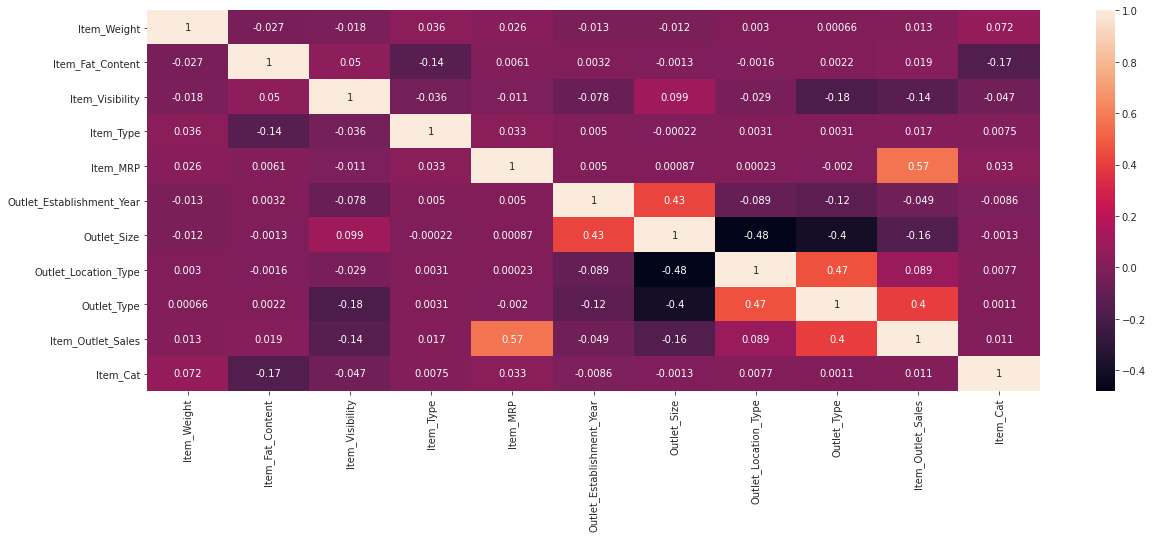

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(dat_Vis.corr(),annot=True);

Item Visibility Item MRP Outlet Size Outlet Type are the columns having the corealtion value higher

In [ ]:
#X1 = dat_Vis[["Item_MRP","Outlet_Type","Outlet_Size","Item_Visibility"]]
X1 = dat_Vis[["Item_Visibility","Item_MRP","Outlet_Size","Outlet_Type"]]
Y1 = dat_Vis['Item_Outlet_Sales'].values

X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.33,random_state=0)
reg2 = LinearRegression()
reg2.fit(X_train,y_train)
y_pred = reg2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),3)

In [ ]:
rmse

1221.042

In [ ]:
print("R2-score: %.2f" % r2_score(y_test,y_pred) )

R2-score: 0.50


In [ ]:
#3,5,
k = np.array([0.019278,48.2692,1,2]).reshape((1,4))
print(reg2.predict(k))
k = np.array([0.079207,46.4744,2,0]).reshape((1,4))
print(reg2.predict(k))
k = np.array([0.072693,110.4912,2,1]).reshape((1,4))
print(reg2.predict(k))

[1549.21071515]
[-288.39040049]
[1532.03853546]


#**Multilinear regression after outliers removal for columns having higher correlation**

In [ ]:
def remove_outliers(imputed_data):
    mean_change = imputed_data['Item_Outlet_Sales'].mean()
    std_change = imputed_data['Item_Outlet_Sales'].std()
    lower = mean_change - 2 * std_change
    upper = mean_change + 2 * std_change
    cleaned_data = imputed_data[(imputed_data['Item_Outlet_Sales'] > lower) & (imputed_data['Item_Outlet_Sales'] < upper)]
    number_of_rows_after_removal = cleaned_data.shape[0]
    return cleaned_data, number_of_rows_after_removal

In [ ]:
data_WOUT,_ = remove_outliers(dat_Vis)
X1 = data_WOUT[["Item_Visibility","Item_MRP","Outlet_Size","Outlet_Type"]]
Y1 = data_WOUT['Item_Outlet_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X1,Y1, test_size=0.33,random_state=0)
reg3 = LinearRegression()
reg3.fit(X_train,y_train)
y_pred = reg3.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = round(np.sqrt(mse),3)
print(rmse)

1020.746


In [ ]:
print("R2-score: %.2f" % r2_score(y_test,y_pred) )

R2-score: 0.44


In [ ]:
k = np.array([0.019278,48.2692,1,2]).reshape((1,4))
print(reg3.predict(k))
k = np.array([0.079207,46.4744,2,0]).reshape((1,4))
print(abs(reg3.predict(k)))
k = np.array([0.072693,110.4912,2,1]).reshape((1,4))
print(reg3.predict(k))

[1514.68557839]
[14.23777011]
[1485.43025399]


In [ ]:
def encode():
    dat = d.copy()
    labelencoder=LabelEncoder()
    dat[['Item_Fat_Content']] = labelencoder.fit_transform(dat[['Item_Fat_Content']])
    dat[['Item_Type']] = labelencoder.fit_transform(dat[['Item_Type']])
    dat[['Outlet_Size']] = labelencoder.fit_transform(dat[['Outlet_Size']])
    dat[['Outlet_Location_Type']] = labelencoder.fit_transform(dat[['Outlet_Location_Type']])
    dat[['Outlet_Type']] = labelencoder.fit_transform(dat[['Outlet_Type']])
    #dat[['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']] = labelencoder.fit_transform(dat[['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']])
    dat = dat.drop(['Item_Identifier','Outlet_Identifier', 'Item_Category'],axis=1)

**Since the data is evenly distributed along the range of the values the removal of outliers reduces the meaningful data present for the training set. Hence there is reduction in accuracy of the values predicted**